## Introduction

In this project, I aim to analyse the dataset <a href="https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep/data">(link)</a> created for the study of smart-pillow (citation below). In this dataset, we see the relationship between different parameters- snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high) that has been generated from Literature Review. (No human subjects were considered)

My aim is to analyse the data and create a supervised learning model that is able to predict the right amount of stress level for the user of smart pillow based on readings from different sensors.

Github link: https://github.com/arshit3005/CSCA-5622-Final-project.git

Citations-

1) L. Rachakonda, A. K. Bapatla, S. P. Mohanty, and E. Kougianos, “SaYoPillow: Blockchain-Integrated Privacy-Assured IoMT Framework for Stress Management Considering Sleeping Habits”, IEEE Transactions on Consumer Electronics (TCE), Vol. 67, No. 1, Feb 2021, pp. 20-29.
2) L. Rachakonda, S. P. Mohanty, E. Kougianos, K. Karunakaran, and M. Ganapathiraju, “Smart-Pillow: An IoT based Device for Stress Detection Considering Sleeping Habits”, in Proceedings of the 4th IEEE International Symposium on Smart Electronic Systems (iSES), 2018, pp. 161--166.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('SaYoPillow.csv')

In [3]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [4]:
#renaming the columns as per the original guidance for the dataset
df.rename(columns={"sr": "snoring rate", "rr": "respiration rate","t":"body temp","lm":"limb movement","bo":"blood oxygen","rem":"eye movement","sr.1":"sleeping hours","hr":"heart rate","sl":"stress level"},inplace=True)

## EDA

In [5]:
df.describe()

,snoring rate,respiration rate,body temp,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [6]:
df.isnull().any() | df.isna().any()

snoring rate        False
respiration rate    False
body temp           False
limb movement       False
blood oxygen        False
eye movement        False
sleeping hours      False
heart rate          False
stress level        False
dtype: bool

As we can see, the data does not have any missing values or non-numeric values so no need to drop any rows or fill any missing values.

In [7]:
df['stress level'].value_counts()

stress level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

We can see that we have an equal sample of different stress levels which is our target variable so we're less likely to have bias in the model.

In [8]:
df.corr()

,snoring rate,respiration rate,body temp,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
snoring rate,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
respiration rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
body temp,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
limb movement,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
blood oxygen,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
eye movement,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
sleeping hours,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
heart rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
stress level,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


We can see that all of the variables are highly correlated with the target variable. 

<b>Columns positively correlated:</b> Snoring rate, respiration rate, limb movement, eye movement, heart rate

<b>Columns negatively correlated:</b> Body temperature, bloody oxygen, sleeping hours<hr>

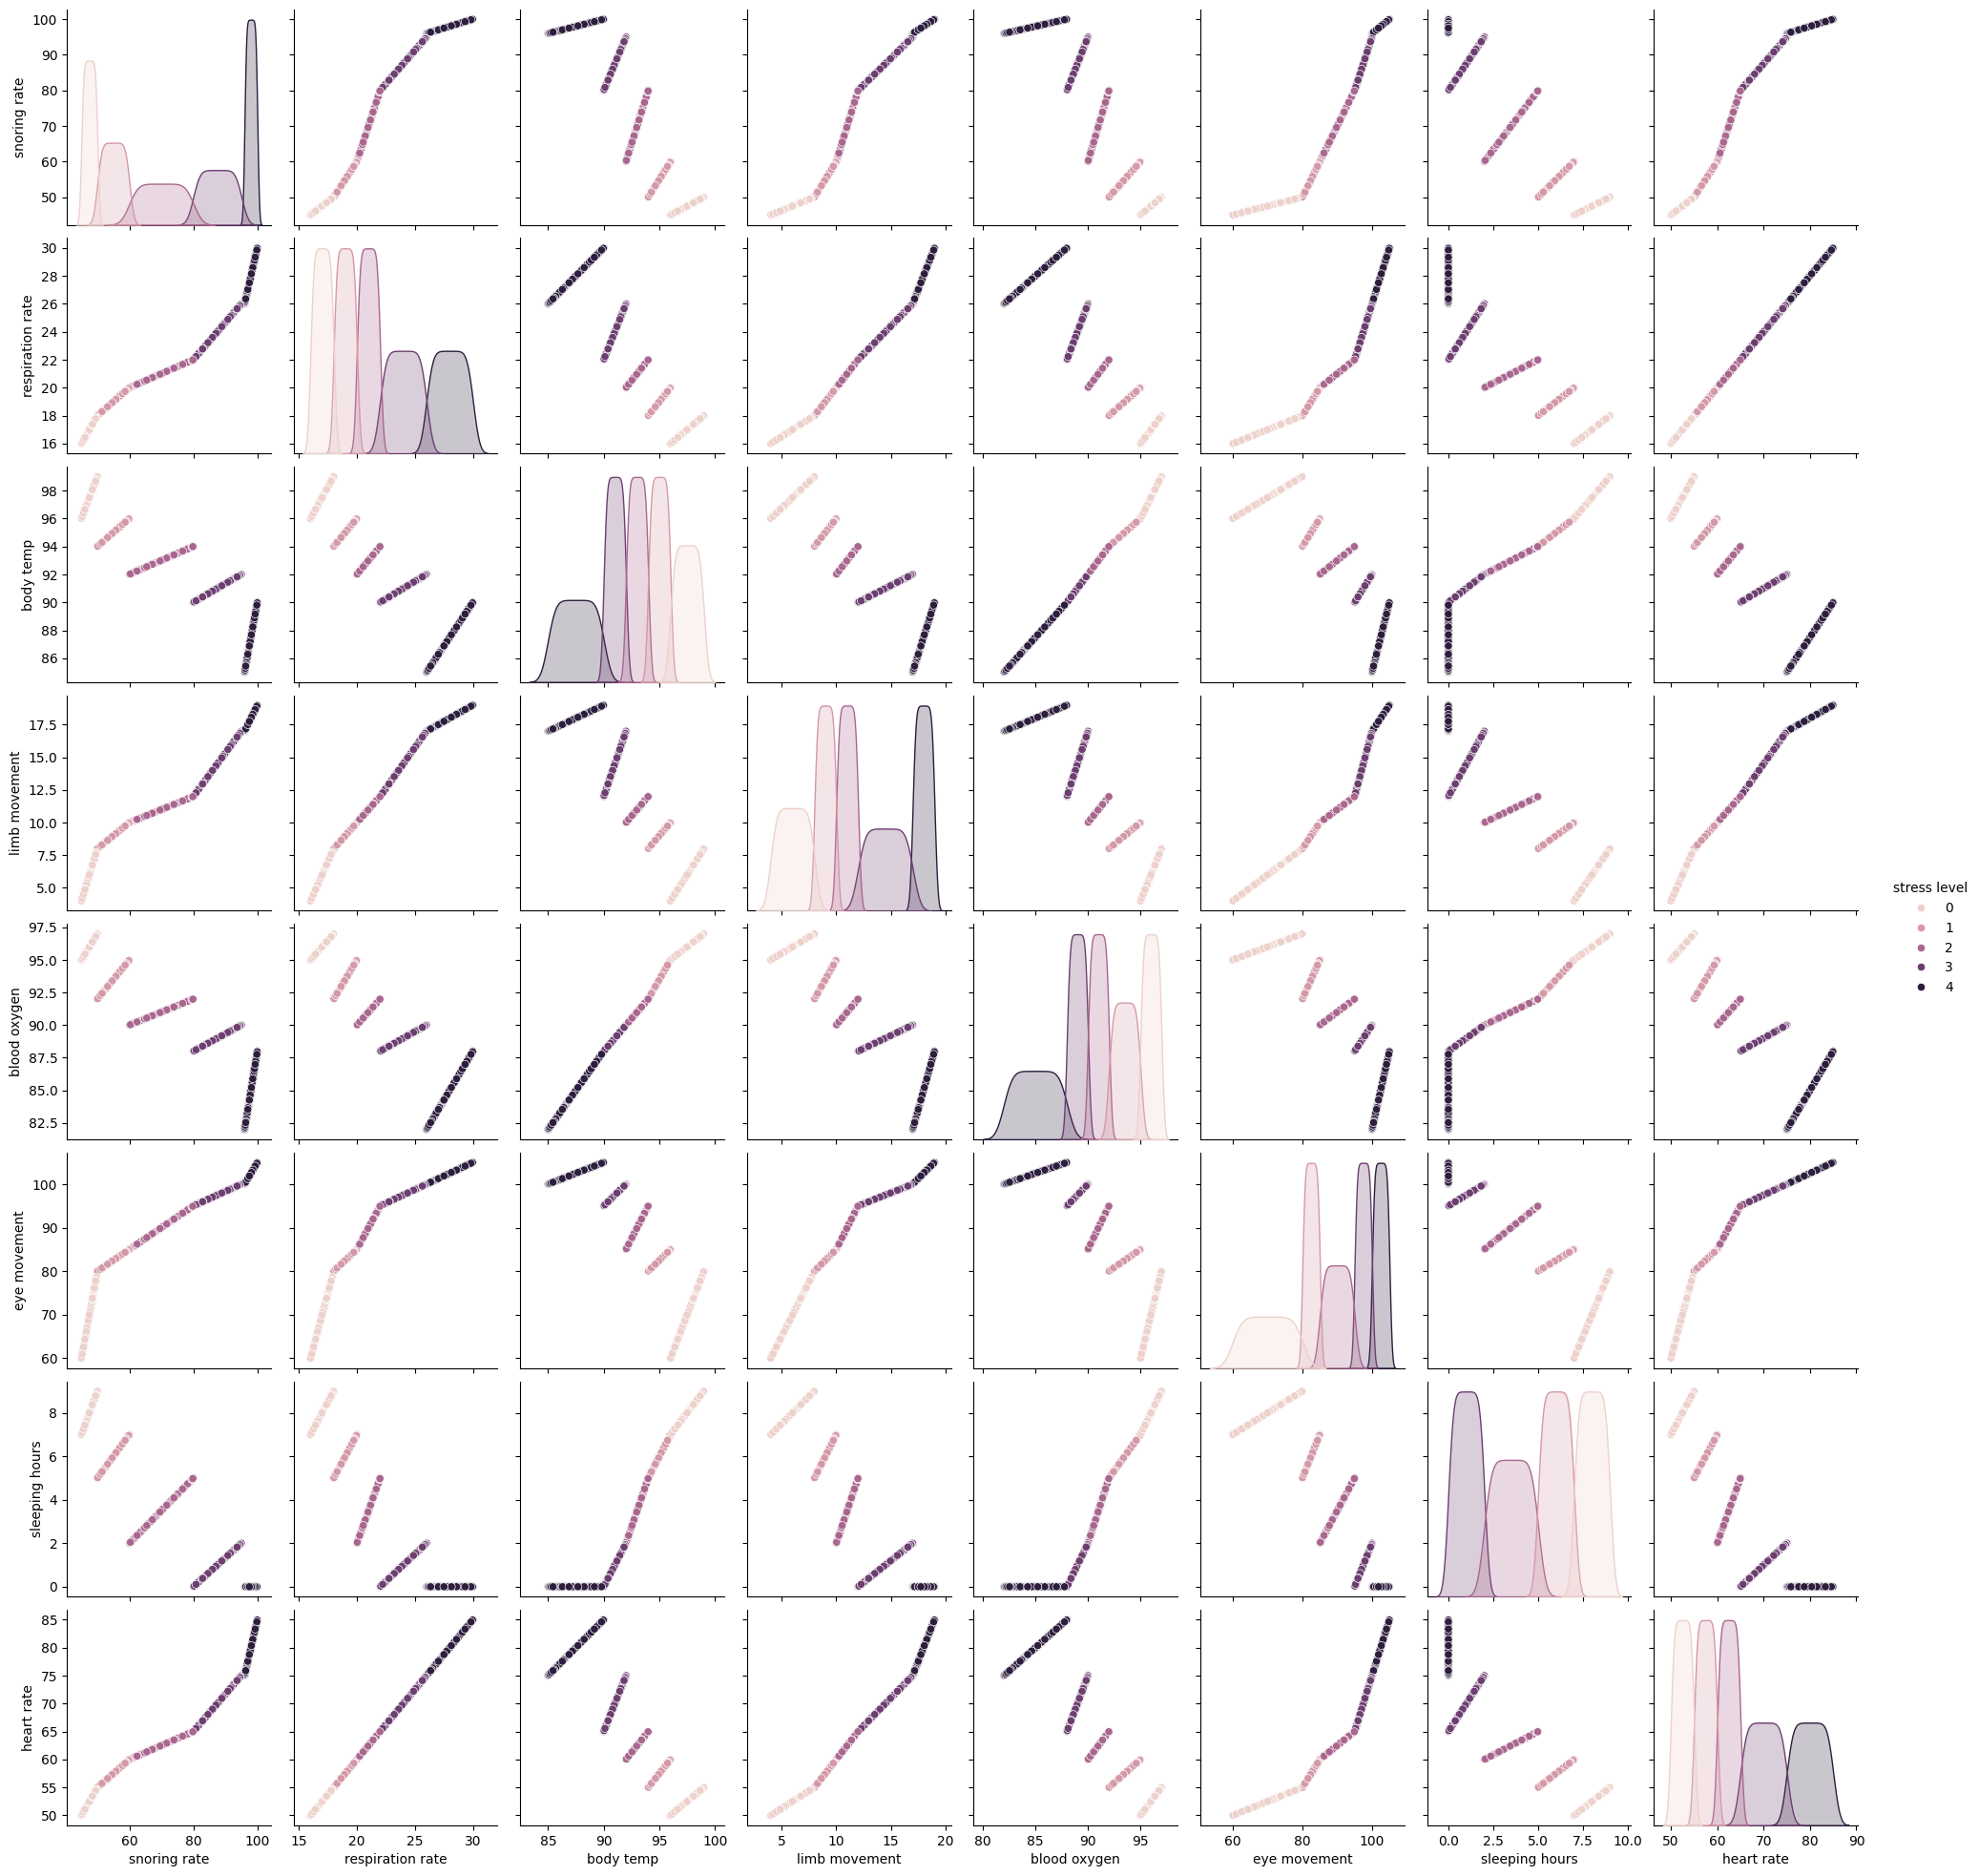

In [9]:
sns.pairplot(df, hue="stress level")

We can observe that there is a clear segregation between values of different sensors corresponding to each stress level. You can visually make out what value likely corresponds to what stress level, hence the complexity of the data is low and it should be easy to train a model on it that can make accurate predictions. 

<Axes: title={'center': 'Box plot of different variables'}>

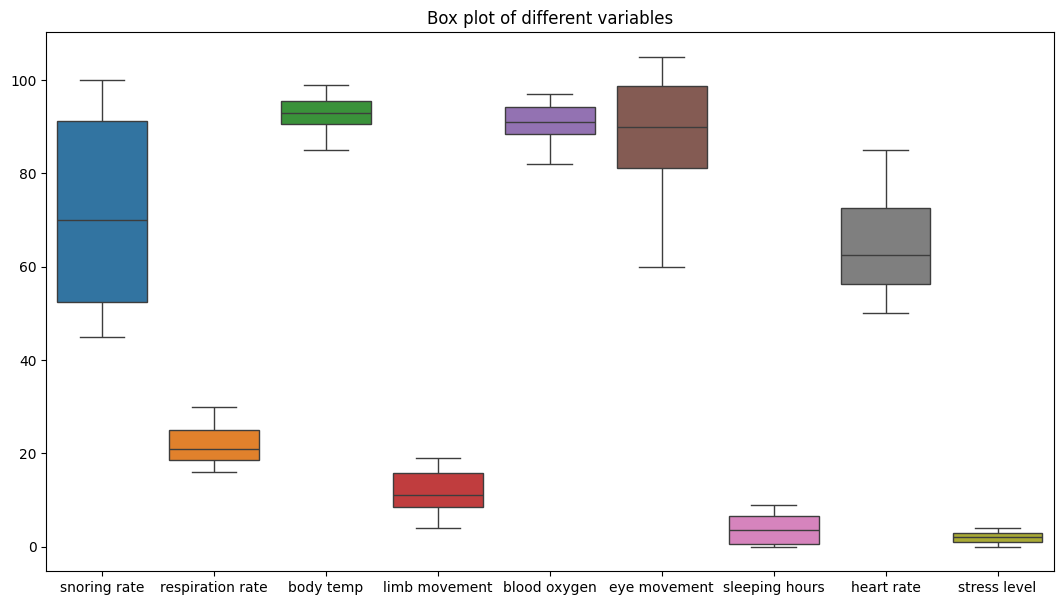

In [10]:
plt.figure(figsize=(13,7))
plt.title('Box plot of different variables')
sns.boxplot(df)

## Model preparation and analysis

In [11]:
X=df.drop(columns='stress level')
Y=df[['stress level']]

In [12]:
def normalization(data): #Gaussian normalization
    for column in data.columns:
        mean=np.mean(data[column])
        std=np.std(data[column])
        data[column]=(data[column]-mean)/std
    return data

In [13]:
X=normalization(X)
X.head()

,snoring rate,respiration rate,body temp,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True) # 80% train 20% test split

In [15]:
param_grid = {
    'max_depth': range(1, 5, 1),
    'min_samples_leaf': range(1, 10, 2),
    'min_samples_split': range(2, 10, 2),
    'criterion': ["entropy", "gini"]
}

In [16]:
tree=DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree,param_grid=param_grid,cv=5,verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
best accuracy 0.9900990099009901
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7,
                       min_samples_split=4)


In [17]:
final_tree=grid_search.best_estimator_
y_pred=final_tree.predict(X_test)

In [18]:
print('Test accuracy:',accuracy_score(y_pred,y_test))

Test accuracy: 0.9761904761904762


As we can see, our model has a test accuracy of 97.6% which is quite great and not surprising as the data is not that complex

## Conclusion

In this project, I aimed to tackle a classification problem and analyse data for smart-pillow which would be able to indicate the user's stress levels based on readings from a variety of sensors. Upon on exploring the data, we found out that the not only the data/trends were not complex, they were highly correlated as well. We plotted the data in different forms to analyse it visually to see any complexities or outliers but didn't find any.

Given the data was simple enough (since it was synthetic), I chose to use a decision tree classifier and ran a grid search to find the optimal hypermataers. After finding the tree with the opimal parameters, I ran the model on the test data and my model had a high accuracy of 97.6%. Now given the data was synthetic, it is understable if the smart pillow has a lower accuracy in real world with a human subject but that is not the aim of this project.